https://jehyunlee.github.io/2021/03/04/Python-DS-63-mpl_colors_qualitative/

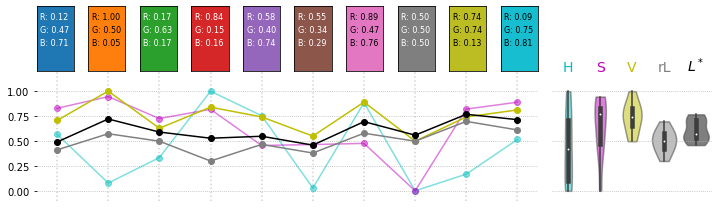

In [21]:
import matplotlib.pyplot as plt
from matplotlib import cm
from colorspacious import cspace_converter
import seaborn as sns

# 컬러맵 불러오기
cmap_ = plt.get_cmap("tab10")
# 컬러맵의 색 수
ncmap = len(cmap_.colors)

try: # qualitative colormap
    ncmap = len(cmap_.colors)
except AttributeError: # others
    ncmap = 10
    cmap_ = cm.get_cmap(cmap, ncmap)

# 수가 너무 많으면 10개로 제한
if ncmap > 15:
    ncmap = 10
    
# subplots 나누기 (ncmap 반영)
fig, axes = plt.subplots(ncols=ncmap+1, nrows=2, figsize=(10, 3), 
                         gridspec_kw={"height_ratios":[1, 2],
                                      "width_ratios": [7/ncmap]*ncmap + [3],
                                      "hspace":0}
                        )

# 폰트 설정
fonts_ex = {"color":"gray", "ha":"center", "va":"center", "fontsize":"x-large"}

# 컬러맵 데이터 모음 list
Hs, Ss, Vs, rLs, Ls = [], [], [], [], []

# 컬러맵으로 subplot 채우고 RGB 정보 입력
for i, ax in enumerate(axes[0, :-1]):
    ax.set_facecolor(cmap_(i/ncmap))
    ax.set_xticks([])
    ax.set_yticks([])
    # RGB + alpha
    R, G, B, A = cmap_(i/ncmap)
    # HSV
    H, S, V = colors.rgb_to_hsv((R, G, B))
    # 밝기
    L, _, _ = cspace_converter("sRGB1", "CAM02-UCS")([R, G, B])
    # relative luminance
    rL = 0.2126*R + 0.7152*G + 0.0722*B
    
    # 데이터 모음
    Hs.append(H)
    Ss.append(S)
    Vs.append(V)
    Ls.append(L/100)
    rLs.append(rL)

    fontcolor = "k"
        
    # 밝기 기준 어두운 색은 밝은 색으로 표시
    if L/100 < 0.6:
        fontcolor = "w"
    ax.text(0.1, 0.8, f"R: {R:.2f}", c=fontcolor, transform=ax.transAxes, fontsize=8)
    ax.text(0.1, 0.6, f"G: {G:.2f}", c=fontcolor, transform=ax.transAxes, fontsize=8)
    ax.text(0.1, 0.4, f"B: {B:.2f}", c=fontcolor, transform=ax.transAxes, fontsize=8)

# 좌측 하단 subplots 합침: axbig        
gs = axes[1, 0].get_gridspec()    
for ax in axes[1, :-1]:
    ax.remove()
axbig = fig.add_subplot(gs[1, :-1])

# 색상별 데이터 plot
axbig.plot(Hs, "-o", c="c", alpha=0.5)  # hue (색상)
axbig.plot(Ss, "-o", c="m", alpha=0.5)  # saturation (채도)
axbig.plot(Vs, "-o", c="y")             # value (정도)
axbig.plot(rLs, "-o", c="gray")         # relative luminance (상대 휘도)
axbig.plot(Ls, "-o", c="k")             # lightness (밝기)

# 색상별 데이터 subplot 설정
axbig.set_xticks([])                 # xticks 삭제
axbig.set_xlim(-0.4, ncmap-1 + 0.4)  # x 범위 지정
axbig.set_ylim(-0.1, 1.2)            # y 범위 지정

for x in range(ncmap):               # x축 grid 대체 점선
    axbig.axvline(x, ls=":", c="lightgray", zorder=0)
axbig.grid(axis="y", ls=":")         # y축 grid
axbig.set_frame_on(False)            # 윤곽선 삭제

# 색 속성 분포
sns.violinplot(data=[Hs, Ss, Vs, rLs, Ls], alpha=0.5, cut=0, ax=axes[1, -1])
# violin plot 색상, 불투명도 지정
for i, c in enumerate(["c", "m", "y", "gray", "k"]):
    axes[1, -1].get_children()[2*i].set_facecolor(c)
    axes[1, -1].get_children()[2*i].set_alpha(0.5)
# violin plot subplot 설정
axes[1, -1].set_ylim(-0.1, 1.2)
axes[1, -1].grid(axis="y", ls=":")
axes[1, -1].set_frame_on(False)
axes[1, -1].set_yticks([0, 0.5, 1])
axes[1, -1].set_yticklabels([])
axes[1, -1].set_xticks([0, 1, 2, 3, 4])
axes[1, -1].set_xticklabels([])
axes[1, -1].tick_params(length=0)

# 우측 상단 subplot 설정: violin plot의 xticklabels로 활용.
axes[0, -1].axis(False)
axes[0, -1].set_xlim(axes[1, -1].get_xlim())
axes[0, -1].set_xticks([0, 1, 2, 3, 4])
font_hsv = {"fontsize": 14, "ha": "center"}
axes[0, -1].text(0, 0, "H", fontdict=font_hsv, color="c")
axes[0, -1].text(1, 0, "S", fontdict=font_hsv, color="m")
axes[0, -1].text(2, 0, "V", fontdict=font_hsv, color="y")
axes[0, -1].text(3, 0, "rL", fontdict=font_hsv, color="gray")
axes[0, -1].text(4, 0, r"$L^*$", fontdict=font_hsv, color="k")

fig.tight_layout()